## <font color="Purple">**PRCP- 1001- RiceLeaf disease detection**</font>

In [3]:
from IPython.display import Image, display


In [9]:
pwd

'C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN'

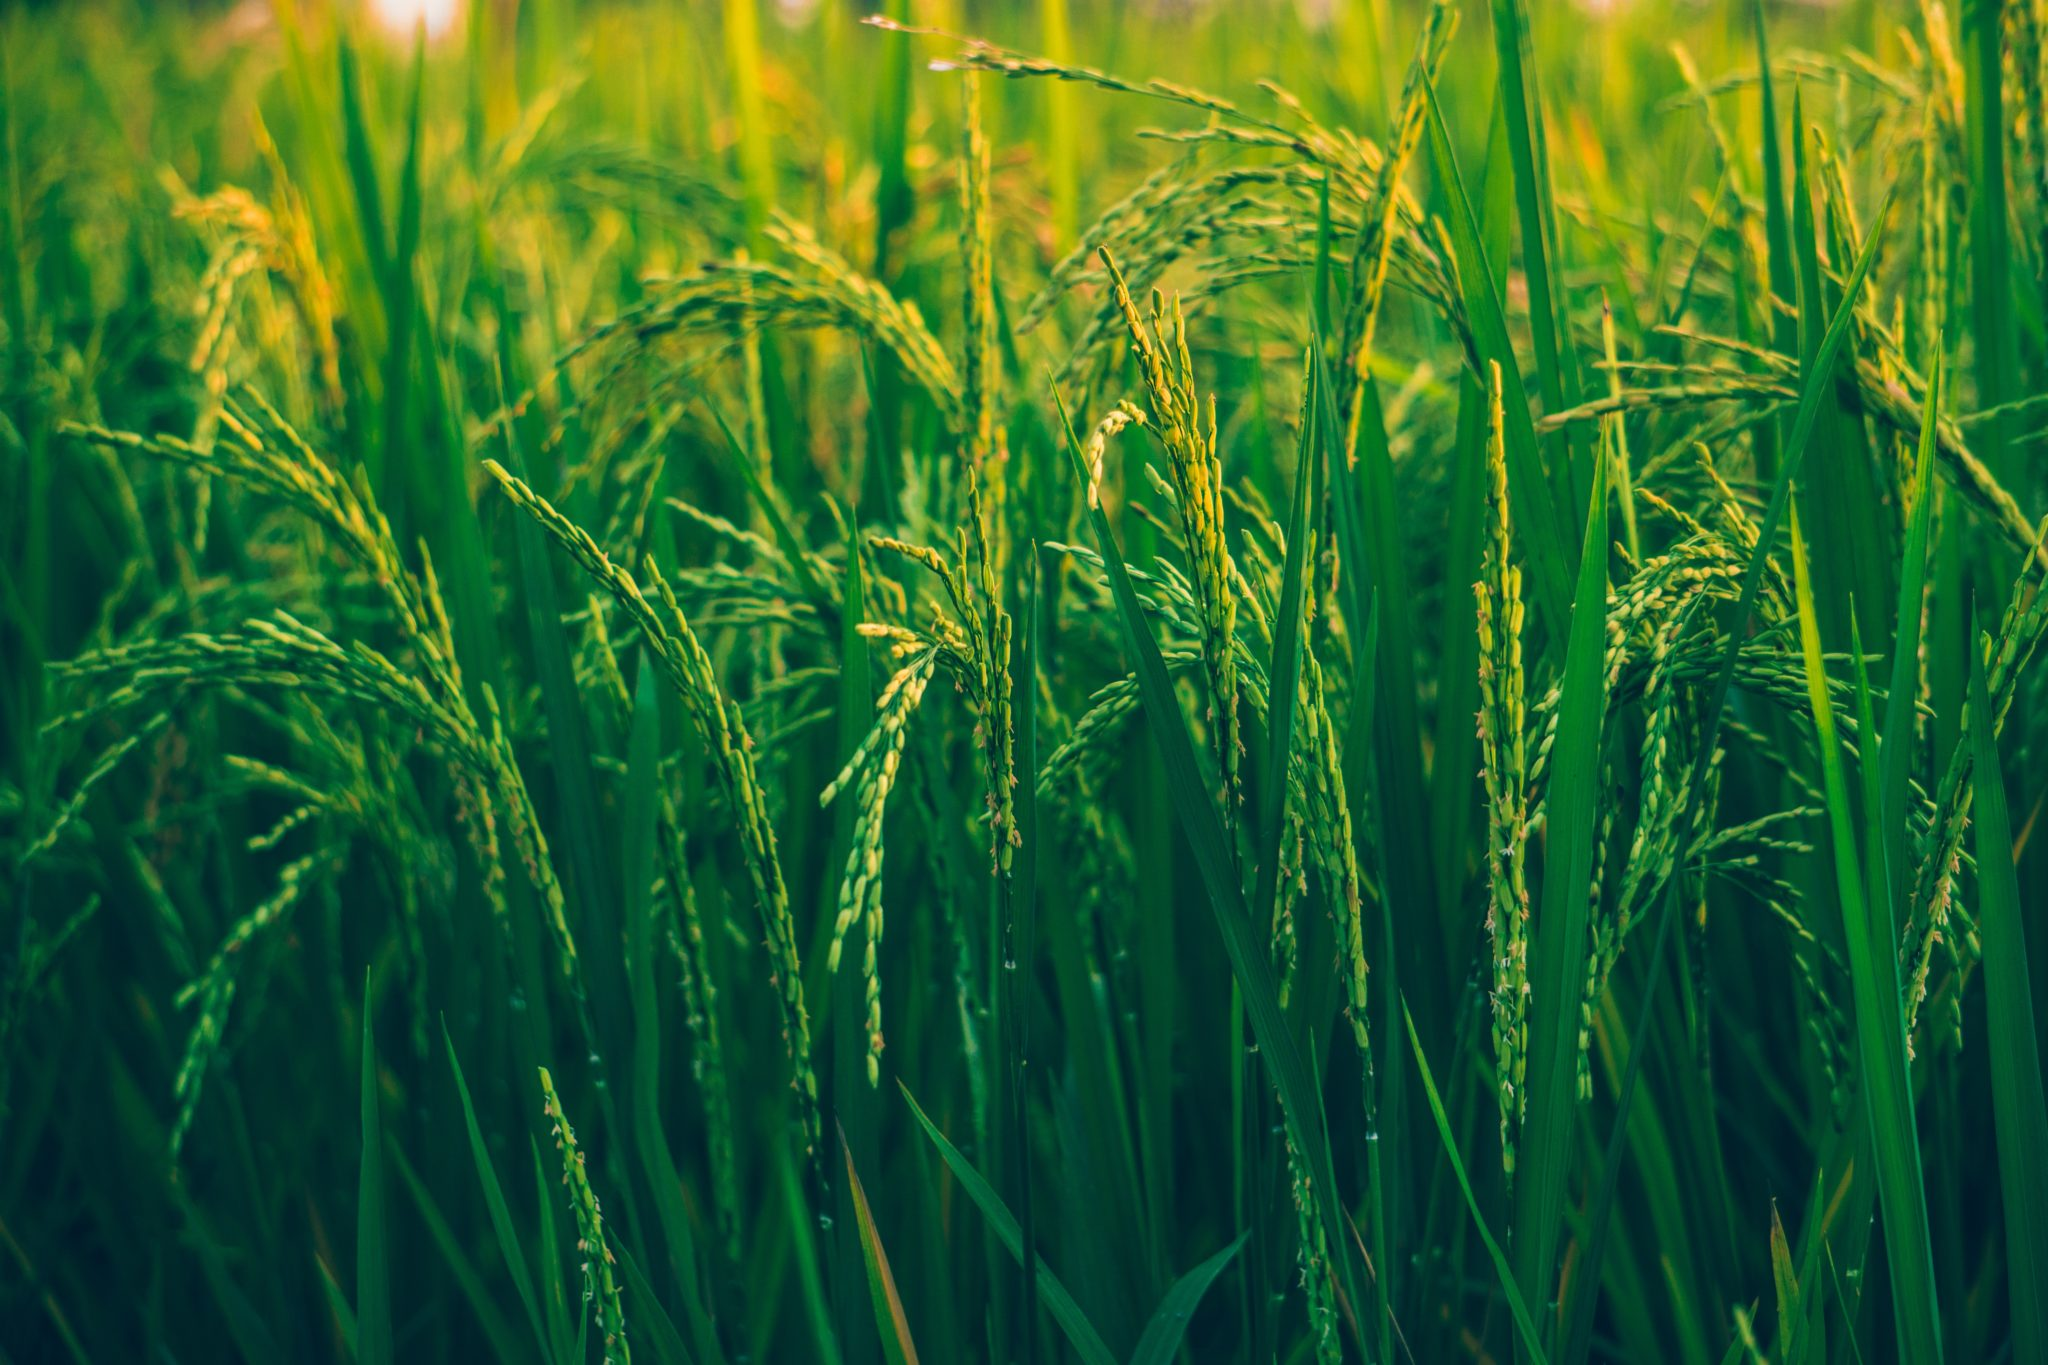

In [10]:
# Change this to the path of your image file
image_path = "C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN\\rice sprouts.jpg"  
display(Image(filename=image_path))


### <font color="green"> Introduction</font>

- Rice is an essential food crop that is cultivated in many countries. rice leaf diseases can cause significant damage to crop cultivation
- It is leads to reduced yields and economic losses, traditional disease detection methods are often time-consuming, labour-intensive and require expertise
- Automatic predictive model detection helps to the farmer at the earlier stage of the rice leaf disease
- Most of the earlier studies prediction done on using image processing and ML techniques that is extract features from disease leaf images and Model learn from it
- After deeplearning introduced, model will learn complex pattern from large data set without explicit feature extraction technique

### <font color="Green">Domain Analysis</font>
### <font color="purple">Rice Leaf structure </font>

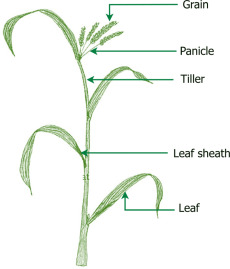

In [16]:
image_path = "C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN\\leaf structure.jpg"  
display(Image(filename=image_path, width=400))

### <font color="purple">Types of Leaf diseases </font>

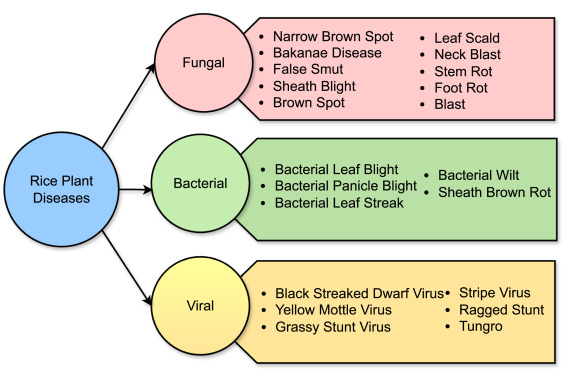

In [18]:
image_path = "C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN\\diseasetypes.jpg"  
display(Image(filename=image_path, width=600))

- These are all the various types of leaf disease might affected the rice leaf
- from that we are going to examine the three major diseases that is 
 - [x] **Bacterial leaf blight**
 - [x] **Brown spot**
 - [x] **Leaf smut**

### <font color="purple">CNN Model Architecture</font>

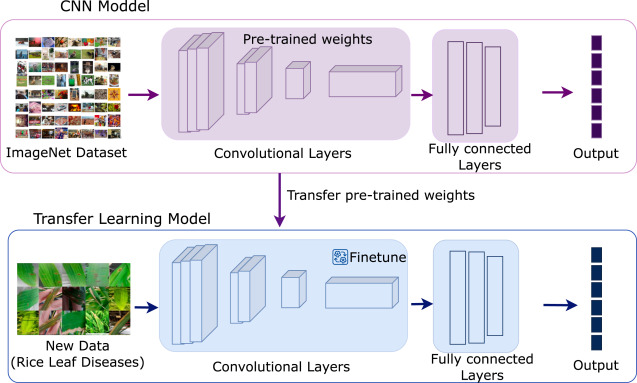

In [14]:
image_path = "C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN\\cnnarch.jpg"  
display(Image(filename=image_path,  width=800))

### Key Components of CNN Architecture

### **Convolutional Layers:**

- Convolution Operation: This layer applies a set of filters (kernels) to the input image. Each filter scans across the image and produces an activation map that highlights features such as edges, textures, or patterns.

- Filters/Kernels: Small matrices that slide over the input data to perform the convolution operation. Common sizes are 3x3, 5x5, or 7x7.

- Stride: The number of pixels by which the filter moves across the input matrix. A stride of 1 means the filter moves one pixel at a time.

- Padding: Adding extra pixels around the input image to control the spatial dimensions of the output. Types include 'valid' (no padding) and 'same' (padding to ensure output size is the same as input size).

### **Activation Functions:**
- Applied element-wise to introduce non-linearity into the model. The most common activation function in CNNs is the Rectified Linear Unit (ReLU), defined as
ReLU(x)=max(0,x).

### **Pooling Layers:**

- Max Pooling: This operation downsamples the input by taking the maximum value in each patch of the feature map, typically using a 2x2 filter with a stride of 2. It reduces the spatial dimensions and helps make the detection of features invariant to scale and position.

- Average Pooling: Similar to max pooling, but takes the average of values in each patch instead of the maximum.

### **Fully Connected (Dense) Layers:**
- These layers are traditional neural network layers where each neuron is connected to every neuron in the previous layer. They are typically used at the end of the network to perform classification based on the extracted features.

### **Dropout:**

- A regularization technique where a fraction of the neurons are randomly set to zero during training to prevent overfitting. This forces the network to learn more robust features.

### **Softmax Layer:**

- The final layer in a classification CNN that converts the output into a probability distribution over classes.

### <font color="green">Problem Statement</font>

**To develop  a Convolutional Neural Network (CNN) model to accurately classify rice leaf diseases based on images of infected leaves**

### <font color="green">Objective</font>

- [x] Setup a complete **data analysis report** on the given data

- [x] **Create a predictive model** to classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot**

- [x] compare with various techniques like **Data Augmentation** and **create a report** for that


### <font color="green">Table of contents</font>

- [x] <font color="brown">**Introduction**</font>
- [x] <font color="brown">**Domain Analysis**</font>
- [x] <font color="brown">**Objective**</font>
- [x] <font color="brown">**Data Analysis report**</font>
- [x] <font color="brown">**Import data**</font>
- [x] <font color="brown">**Exploratory data analysis**</font>
- [x] <font color="brown">**Data preprocessing**</font>
- [x] <font color="brown">**Splitting train and test**</font>
- [x] <font color="brown">**Model Implementation**</font>
- [x] <font color="brown">**Model Evaluation**</font>
- [x] <font color="brown">**Model Comparison**</font>
- [x] <font color="brown">**Hardships faced**</font>
- [x] <font color="brown">**Conclusion**</font>       

### <font color="purple">Task 1:</font> <font color="green">Complete Data analysis Report</font>
- To set up a complete data analysis report for rice leaf disease prediction project, follow these steps:

**1.Introduction:**

- Objective: State the objective of the analysis, which is to predict rice leaf diseases using a CNN algorithm.

- Dataset: Briefly describe the dataset, including the three disease categories: bacterial leaf blight, brown spot, and leaf smut.

**2.Data Preparation:**

- Loading the Data: Show how to load the image data from the directories.

- Data Augmentation: Describe the data augmentation techniques used to increase the size and variability of the dataset.

**3.Exploratory Data Analysis (EDA):**
- Visualize Sample Images: Display a few sample images from each disease category.

- Class Distribution: Plot the distribution of images across different classes to ensure balanced data.

**4.Data Preprocessing:**

- Resizing and Normalizing: Explain how images are resized and normalized.

- Splitting Data: Split the data into training, validation, and test sets.

**5.Model Building:**

- CNN Architecture: Describe the architecture of the CNN model used.

- Training the Model: Show the training process and the hyperparameters used.

- Data Augmentation Impact: Compare the performance of models trained with and without data augmentation.

**6.Evaluation:**

- Confusion Matrix: Plot and interpret the confusion matrix.

- Classification Report: Generate and interpret the classification report.

- Accuracy Comparison: Compare the accuracy of different models using bar plots.

**7.Conclusion:**

- Summary of Findings: Summarize the key findings from the analysis.

- Future Work: Suggest possible improvements or future work

In [249]:
!pip install opencv-python

In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pathlib
import random
import cv2
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the data

In [39]:
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [41]:
data_dir = "C:\\Users\\Kalai\\Python Basics\\DM projects\\CNN\\Data"
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Kalai/Python Basics/DM projects/CNN/Data')

### List each folder

In [42]:
bacteria = list(data_dir.glob("bacleafblight/*"))
len(bacteria)

40

In [43]:
brown_spot = list(data_dir.glob("brownspot/*"))
len(brown_spot)

40

In [44]:
smut = list(data_dir.glob("Leafsmut/*"))
len(smut)

39

### <font color="green">Basic EDA</font>

### Visualize some of the images from each folder

Bacterial Leaf Blight: 40 images
Brown Spot: 40 images
Leaf Smut: 39 images


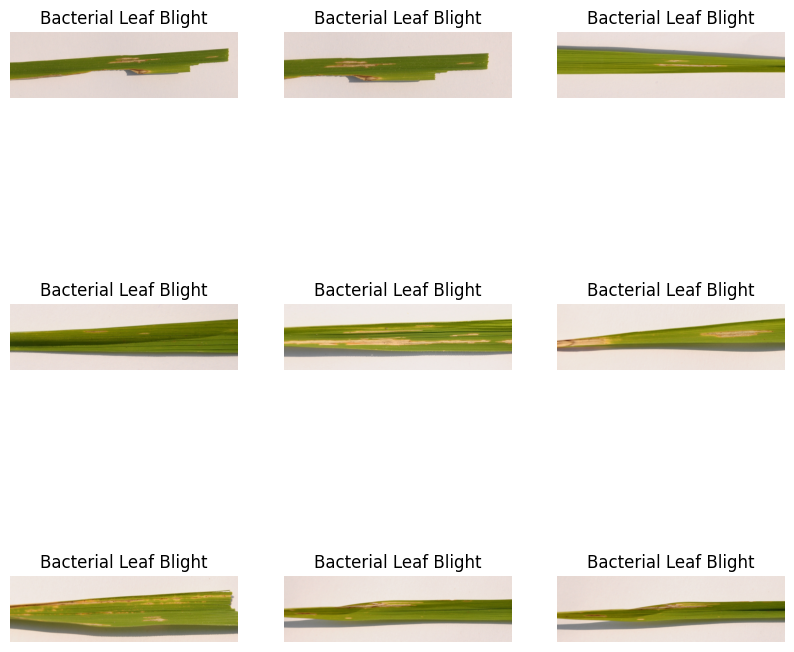

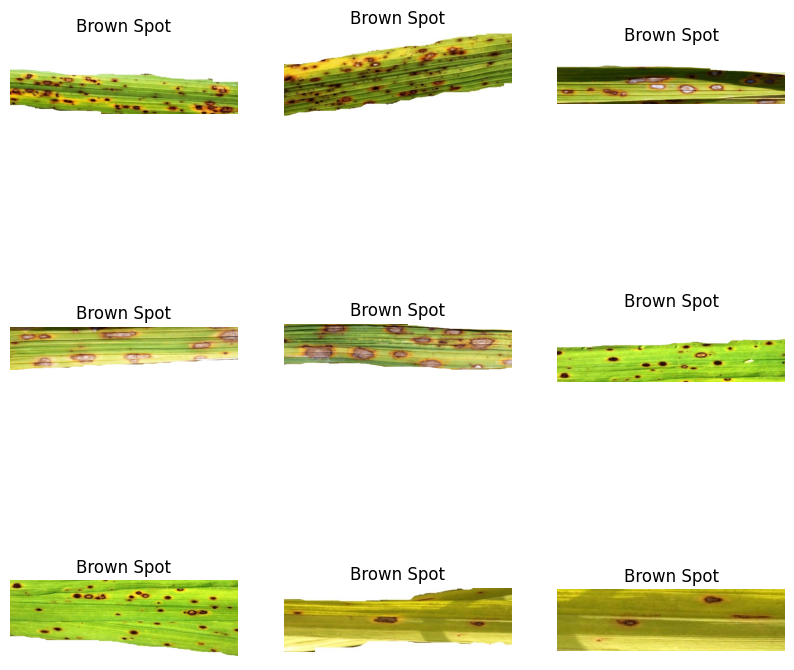

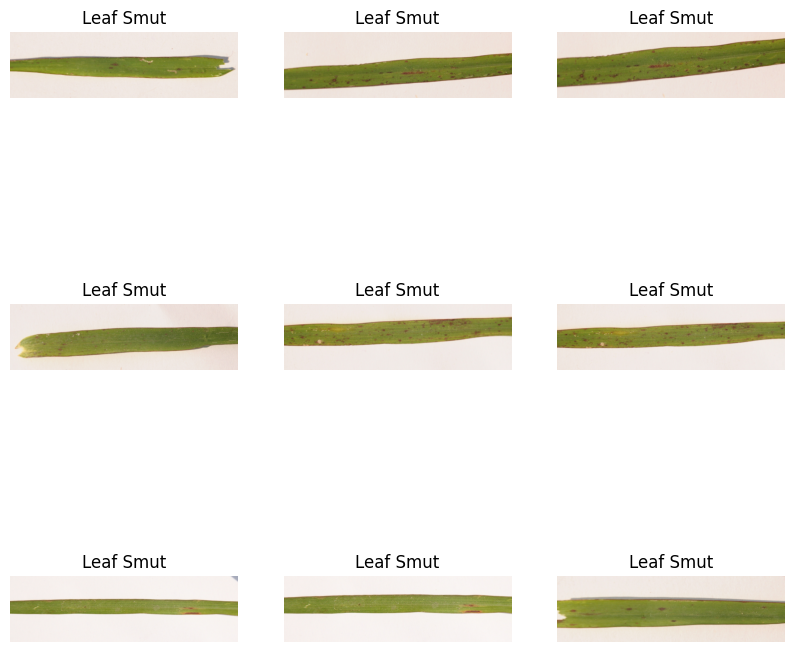

In [45]:
def display_images(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img = cv2.imread(str(images[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")


# Display images
print(f"Bacterial Leaf Blight: {len(bacteria)} images")
display_images(bacteria, "Bacterial Leaf Blight")

print(f"Brown Spot: {len(brown_spot)} images")
display_images(brown_spot, "Brown Spot")

print(f"Leaf Smut: {len(smut)} images")
display_images(smut, "Leaf Smut")

plt.show()

### Create a dictionary for the folders

In [46]:
dict = {"bacteria":list(data_dir.glob("bacleafblight/*")), "brown_spot":list(data_dir.glob("brownspot/*")), 
        "smut":list(data_dir.glob("Leafsmut/*"))}
label = {'bacteria':0, 'brown_spot':1, 'smut':2}

In [48]:
label

{'bacteria': 0, 'brown_spot': 1, 'smut': 2}

### Defining X and Y 

In [49]:
x, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        re_img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_CUBIC)
        x.append(re_img)
        y.append(label[name])

### Import tensor flow

In [ ]:
!pip install tensorflow

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

- ### Train_Test Split
- ### Data preprocessing


In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

# Converting to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Rescaling the Images by dividing every pixel in every image by 255
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

num_classes = len(np.unique(y_train))
print(len(x_train), len(y_train), len(x_test), len(y_test))

#one hot encode the labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Splitting images into train and validation sets
(x_train, x_valid) = x_train[20:], x_train[:20]
(y_train, y_valid) = y_train[20:], y_train[:20]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

89 89 30 30
x_train shape: (69, 224, 224, 3)
69 train samples
30 test samples
20 validation samples


### <font color="purple">Task 2:</font> <font color="green">Create a predictive model</font>

- ### <font color="green">Build the CNN Model</font>

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1=Sequential()
model1.add(Conv2D(16,kernel_size=3,padding='same',activation='relu',input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=3))
model1.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=3))
model1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=3))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 74, 74, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 548,387 (2.09 MB)

 Trainable params: 548,387 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

### <font color="green">Compiling the model1</font>

In [72]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


- ### <font color="green">Checkpoints</font>
- ### <font color="green">Train the model</font>

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = 'model.weights.best.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

In [101]:
history = model1.fit(x_train, y_train, batch_size=224, epochs=30,
          validation_data=(x_valid, y_valid),  callbacks=[checkpoint],
          verbose=3, shuffle=True)

Epoch 1/30

Epoch 1: val_loss did not improve from 2.56821
Epoch 2/30

Epoch 2: val_loss did not improve from 2.56821
Epoch 3/30

Epoch 3: val_loss did not improve from 2.56821
Epoch 4/30

Epoch 4: val_loss did not improve from 2.56821
Epoch 5/30

Epoch 5: val_loss did not improve from 2.56821
Epoch 6/30

Epoch 6: val_loss did not improve from 2.56821
Epoch 7/30

Epoch 7: val_loss did not improve from 2.56821
Epoch 8/30

Epoch 8: val_loss did not improve from 2.56821
Epoch 9/30

Epoch 9: val_loss did not improve from 2.56821
Epoch 10/30

Epoch 10: val_loss did not improve from 2.56821
Epoch 11/30

Epoch 11: val_loss did not improve from 2.56821
Epoch 12/30

Epoch 12: val_loss did not improve from 2.56821
Epoch 13/30

Epoch 13: val_loss did not improve from 2.56821
Epoch 14/30

Epoch 14: val_loss did not improve from 2.56821
Epoch 15/30

Epoch 15: val_loss did not improve from 2.56821
Epoch 16/30

Epoch 16: val_loss did not improve from 2.56821
Epoch 17/30

Epoch 17: val_loss did not im

### <font color="green">Evaluate the model</font>

In [102]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9000 - loss: 1.2236
Test accuracy: 0.8999999761581421


In [103]:
train_score = model1.evaluate(x_train, y_train, verbose=0)
train_accuracy = 100*train_score[1]

test_score = model1.evaluate(x_test, y_test, verbose=0)
test_accuracy = 100*test_score[1]

val_score = model1.evaluate(x_valid, y_valid, verbose=0)
val_accuracy = 100*val_score[1]

train_accuracy = round(train_accuracy, 2)
test_accuracy = round(test_accuracy, 2)
val_accuracy = round(val_accuracy, 2)

print("Training accuracy is:", train_accuracy, "%")
print("Test accuracy is:", test_accuracy, "%")
print("Validation accuracy is:", val_accuracy, "%")

Training accuracy is: 100.0 %
Test accuracy is: 90.0 %
Validation accuracy is: 80.0 %


### Y_prediction

In [109]:
# Calculate y pred
y_pred = model1.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Example of printing some predictions
for i in range(10):  # Print predictions for the first 10 samples
    print(f"Predicted class: {y_pred_classes[i]}, Actual class: {np.argmax(y_test[i])}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Predicted class: 1, Actual class: 1
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 2, Actual class: 2
Predicted class: 1, Actual class: 1


### Plot the confusion matrix

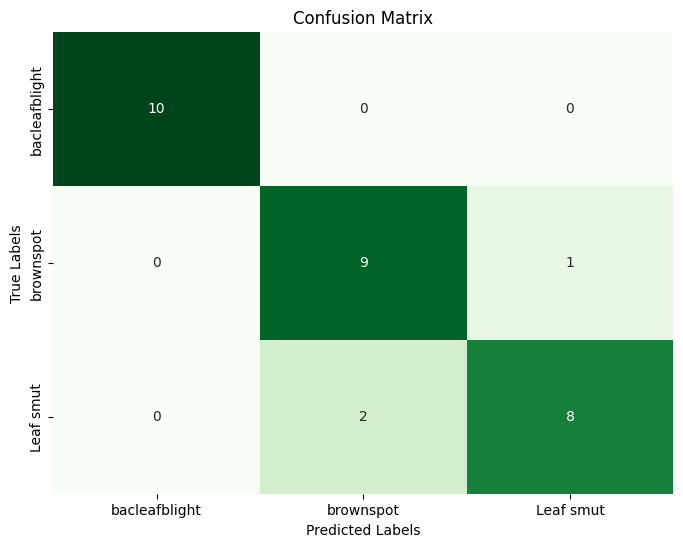

In [117]:
# Create confusion matrix
conf_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Greens', fmt='d', cbar=False,
            xticklabels=['bacleafblight', 'brownspot', 'Leaf smut'],  # Replace with your class labels if needed
            yticklabels=['bacleafblight', 'brownspot', 'Leaf smut'])  # Replace with your class labels if needed
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Classification Report for CNN 

In [246]:
class_labels = ['bacleafblight', 'brownspot', 'Leaf smut'] 
report = classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=class_labels)

In [248]:
print("**classification Report- CNN:**")
print(report)

**classification Report- CNN:**
               precision    recall  f1-score   support

bacleafblight       1.00      1.00      1.00        10
    brownspot       0.82      0.90      0.86        10
    Leaf smut       0.89      0.80      0.84        10

     accuracy                           0.90        30
    macro avg       0.90      0.90      0.90        30
 weighted avg       0.90      0.90      0.90        30



### <font color="green">Plot train and validation accuracy and loss values</font>

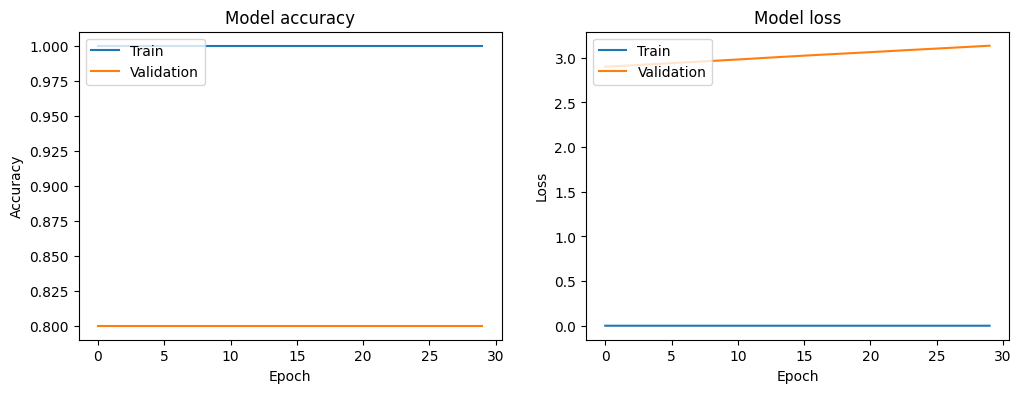

In [104]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Insights:

- The reported accuracies from our training, testing, and validation sets indicate how well the CNN model is performing at different stages of the evaluation:

**Training Accuracy** (100.0%):

- This indicates that your model is perfectly fitting the training data. It correctly predicts the labels of the training images 100% of the time.
- A very high training accuracy, especially 100%, can sometimes be a sign of overfitting, where the model learns the training data very well but fails to generalize to new, unseen data.

**Test Accuracy** (90.0%):

- This reflects how well your model performs on the test dataset, which contains data that was not seen by the model during training.
- A test accuracy of 90% means your model correctly predicts the labels of the test images 90% of the time.
- This indicates a good generalization performance, but there is still some room for improvement.

**Validation Accuracy** (80.0%):

- This represents the model's performance on the validation set, which is typically used during training to monitor the model's performance and tune hyperparameters.
- A validation accuracy of 80% means your model correctly predicts the labels of the validation images 80% of the time.
- This accuracy being lower than the test accuracy suggests that the validation set may be more challenging or not fully representative of the test set.

### Meaning of overfitting and Generalization

**Overfitting**: The perfect training accuracy suggests that your model might be overfitting to the training data. This means it has learned to predict the training data very well but may struggle with new data.

**Generalization**: Despite overfitting, your test accuracy is still quite high (90%), indicating decent generalization. However, the lower validation accuracy (80%) suggests potential issues with generalizing even further.

### Steps to improve

### <font color="purple">Task 3:</font> <font color="green">Compare with various techniques</font>

- ### <font color="green">Data Augmentation technique</font>
- Increase the diversity of your training data by applying transformations such as rotation, translation, flipping, and zooming

In [210]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

### Data Augmentation

In [211]:
datagen = ImageDataGenerator(
 rotation_range=20,  # Example: Increase rotation range
 width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,    # Example: Add shear transformation
    zoom_range=0.2,     # Example: Increase zoom range
    horizontal_flip=True,
    validation_split=0.2
)
datagen.fit(x_train)


In [212]:
model2 = Sequential()
model2.add(Conv2D(16,kernel_size=3,padding='same',activation='relu',input_shape=(224, 224, 3)))
model2.add(MaxPooling2D())
model2.add(Conv2D(32,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(1024))
model2.add(Dropout(0.2))
model2.add(Dense(3,activation='softmax'))

model2.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)                   │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1024)                │      51,381,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 3)                   │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,407,907 (196.11 MB)

 Trainable params: 51,407,907 (196.11 MB)

 Non-trainable params: 0 (0.00 B)

### <font color="green">Compile the model2</font>

In [215]:
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Check point and Early stopping callback

In [217]:
checkpoint_filepath = 'model.weights.best.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

### <font color="green">Train the model2</font>

In [218]:
#train_generator = datagen.flow(x_train, y_train, batch_size=32, subset='training')
#validation_generator = datagen.flow(x_train, y_train, batch_size=32, subset='validation')
history2 = model2.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=25,validation_data=(x_valid, y_valid),
                    #validation_data=validation_generator,
                    callbacks=[checkpoint,early_stopping])

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 866ms/step - accuracy: 0.3040 - loss: 3.8192
Epoch 1: val_loss improved from inf to 9.58872, saving model to model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3113 - loss: 4.5550 - val_accuracy: 0.4000 - val_loss: 9.5887
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3387 - loss: 5.5620
Epoch 2: val_loss improved from 9.58872 to 2.34721, saving model to model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.3337 - loss: 5.2239 - val_accuracy: 0.1500 - val_loss: 2.3472
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3670 - loss: 1.3825
Epoch 3: val_loss improved from 2.34721 to 1.07122, saving model to model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.3695 - loss: 1.3409 - val_accuracy: 0.4500 - val_loss: 1.0712
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3761 - loss: 1.0991
Epoch 4: val_loss improved from 1.07122 to 1.06523, saving 

### <font color="green">Evaluate the model</font>

In [220]:
train_score2 = model2.evaluate(x_train, y_train, verbose=0)
train_accuracy2 = round(100 * train_score2[1], 2)

test_score2 = model2.evaluate(x_test, y_test, verbose=0)
test_accuracy2 = round(100 * test_score2[1], 2)

val_score2 = model2.evaluate(x_valid, y_valid, verbose=0)
val_accuracy2 = round(100 * val_score2[1], 2)

print("Data Aug Training accuracy is:", train_accuracy2, "%")
print("Data Aug Test accuracy is:", test_accuracy2, "%")
print("Data Aug Validation accuracy is:", val_accuracy2, "%")

Data Aug Training accuracy is: 55.07 %
Data Aug Test accuracy is: 53.33 %
Data Aug Validation accuracy is: 55.0 %


### Y_prediction

In [232]:
y_pred_aug= model2.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)

# Example of printing some predictions
for i in range(10):  # Print predictions for the first 10 samples
    print(f"Predicted class: {y_pred_classes_aug[i]}, Actual class: {np.argmax(y_test[i])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 2
Predicted class: 0, Actual class: 0
Predicted class: 1, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 2, Actual class: 2
Predicted class: 0, Actual class: 1
Predicted class: 0, Actual class: 0
Predicted class: 0, Actual class: 2
Predicted class: 0, Actual class: 1


### Plot the confusion matrix

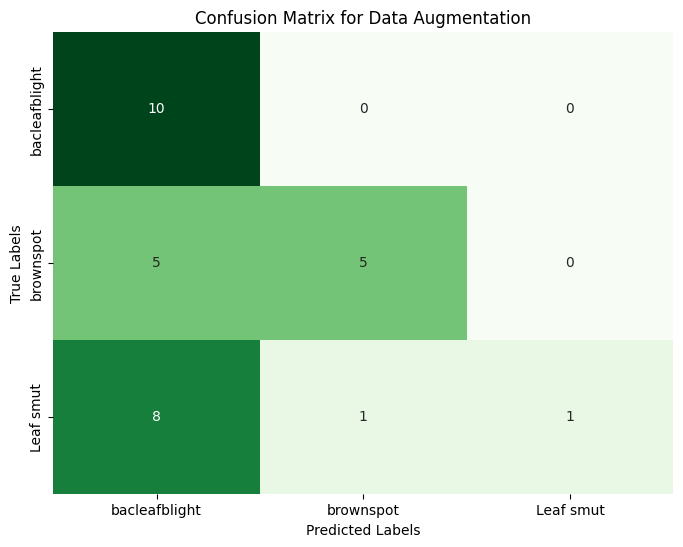

In [234]:
# Create confusion matrix
conf_mat_ag = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes_aug)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_ag, annot=True, cmap='Greens', fmt='d', cbar=False,
            xticklabels=['bacleafblight', 'brownspot', 'Leaf smut'],  # Replace with your class labels if needed
            yticklabels=['bacleafblight', 'brownspot', 'Leaf smut'])  # Replace with your class labels if needed
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Data Augmentation')
plt.show()

### Classification report for DataAug

In [242]:
class_labels = ['bacleafblight', 'brownspot', 'Leaf smut'] 
report = classification_report(np.argmax(y_test, axis=1), y_pred_classes_aug, target_names=class_labels)

In [247]:
print("**classification Report- Data Aug:**")
print(report)

**classification Report- Data Aug:**
               precision    recall  f1-score   support

bacleafblight       1.00      1.00      1.00        10
    brownspot       0.82      0.90      0.86        10
    Leaf smut       0.89      0.80      0.84        10

     accuracy                           0.90        30
    macro avg       0.90      0.90      0.90        30
 weighted avg       0.90      0.90      0.90        30



### Insights:

- The reported accuracies from our training, testing, and validation sets indicate how well the CNN model with data agumentation is performing at different stages of the evaluation:
  
  **Data Augmentation Training Accuracy** (55.07%):
- The model achieved an accuracy of approximately 55.07% on the training set. This accuracy indicates how well the model predicts the classes of the data it was trained on.
- The training accuracy is slightly higher than the test accuracy, suggesting that while the model performs reasonably well on the training data, it may encounter some challenges in generalizing to new, unseen data.

  **Data Augumentation Test Accuracy** (53.33%):
- The test accuracy is approximately 53.33%. This metric shows how well the model generalizes to unseen data, which is crucial for evaluating its real-world performance.
- The validation accuracy is close to the training accuracy, indicating that the model's performance on the validation set is consistent with its performance on the training data. This alignment suggests that the model is likely not overfitting excessively.

  **Data Augumentation Validation Accuracy** (55.0%):
- The validation accuracy is about 55.0%. This metric is important as it gives an estimate of the model's performance on unseen data during the training phase, helping to prevent overfitting.

### Overall performance:
- With accuracies in the range of **53-55%**, the model shows moderate performance. There is room for improvement, especially in enhancing test accuracy to ensure better generalization.

### <font color="green">Model Comparison Report</font>

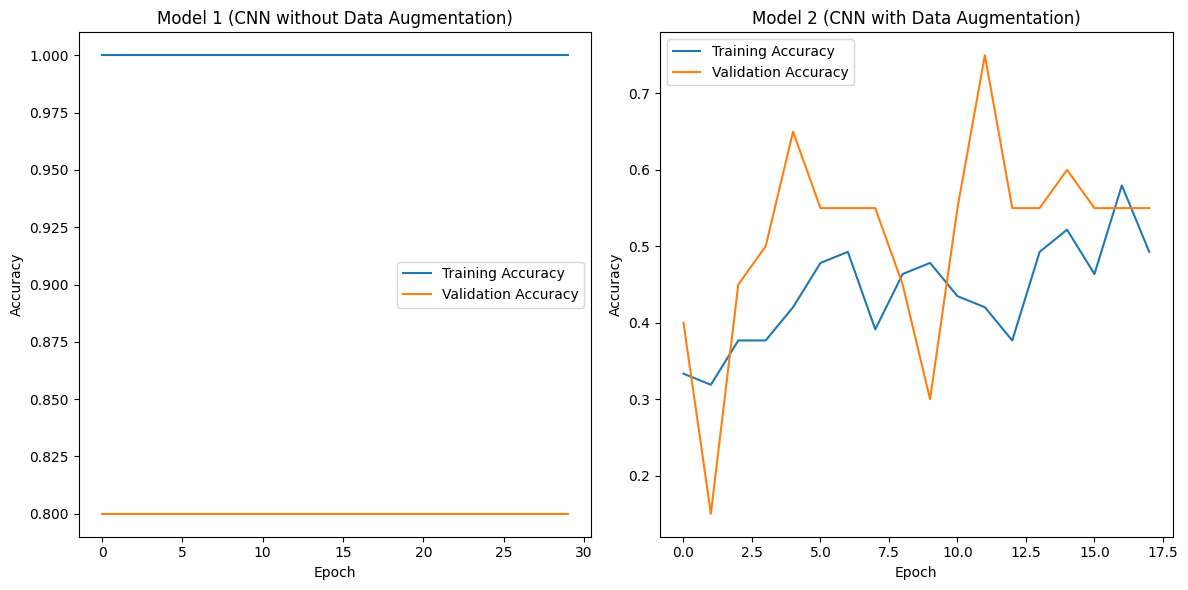

In [225]:
plt.figure(figsize=(12, 6))

# Plot model1 (CNN without data augmentation)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1 (CNN without Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot model2 (CNN with data augmentation)
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2 (CNN with Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### What the plot show

- ### <font color="darkblue">**Model 1**</font>
  - training accuracy straightly show a line to near **100 %** with in few epochs and validation shows a line around 80%
  - we conclude high training accuracy but overfits, indicates by the gaps between training and validation
- ### <font color="darkblue">**Model 2**</font>
  - training accuracy will raise slowly and plateau at around **55%** and validation also follow the similar trends
  - conclude that model doesnot overfit but struggles with learning the training data
  - To improve the Model 2's performance, need to fine-tune the data augmentation techniques, adjust the model architecture, or experiment with             different hyperparameters.

### <font color="green">Compare the Accuracy score </font>

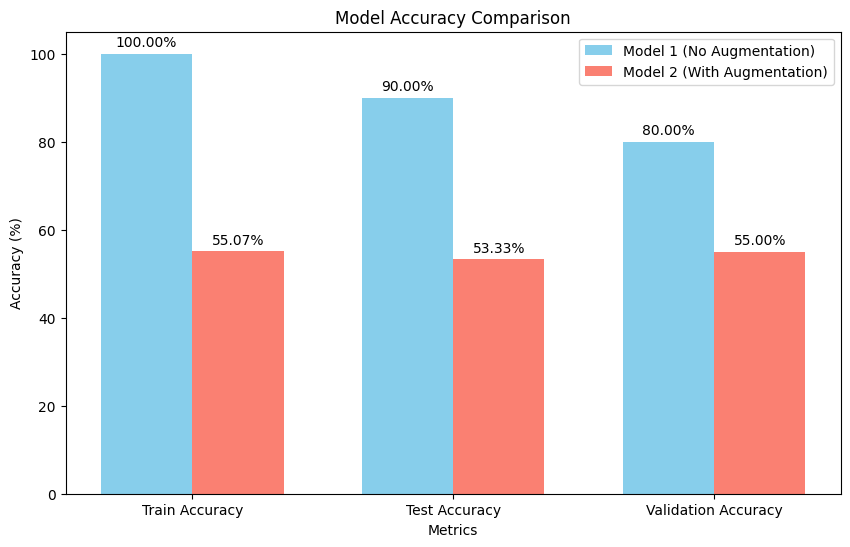

In [230]:
# Accuracy values for Model 1 (Without Data Augmentation)
train_accuracy = 100.0
test_accuracy = 90.0
val_accuracy = 80.0

# Accuracy values for Model 2 (With Data Augmentation)
train_accuracy2 = 55.07
test_accuracy2 = 53.33
val_accuracy2 = 55.0

# Labels for the bar plot
labels = ['Train Accuracy', 'Test Accuracy', 'Validation Accuracy']

# Data to plot
model1_accuracies = [train_accuracy, test_accuracy, val_accuracy]
model2_accuracies = [train_accuracy2, test_accuracy2, val_accuracy2]

# X-axis locations for the groups
x = np.arange(len(labels))

# Width of the bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Model 1
bar1 = ax.bar(x - width/2, model1_accuracies, width, label='Model 1 (No Augmentation)',color='skyblue')

# Plot bars for Model 2
bar2 = ax.bar(x + width/2, model2_accuracies, width, label='Model 2 (With Augmentation)',color='salmon')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%',  # Label text with two decimal points
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # Placement of the text
                    xytext=(0, 3),  # Offset the text
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels to the bars
add_labels(bar1)
add_labels(bar2)

# Display the plot
plt.show()

### Insights:

### <font color="darkblue">**Model without Data Augmentation:**</font>
- The model shows excellent performance on training set which is **100%**, it shows model learned the pattern in trained set very well
- However the drop in testing and validation and their accuracy hits **90% and 80%** respectively, it suggests model may be overfitting
- we conclude that model will perform well on training data but less so unseen data
### <font color="darkblue">**Data with Augmentation:**</font>
- Data augmentation technique helps to artificially increasing the diversity of the training data set and helps to model generalize better to unseen data
- The accuracy reached **55%** which suggests this technique is needs to be revised and parameters will tuned to better suit the dataset
- Experimenting different augmentation strategies will helps to the better model performance 


### <font color="green">Model Improvement</font>

### <font color="purple"> Creating a Flask web application for model prediction </font>

- Train our CNN model and save it as a pickle file.
- Create an HTML file for the user interface.
- Create a Flask app to handle the file upload and model prediction.

### <font color="green"> Step1: Train and save our model </font>

In [251]:
import pickle

# model1 is our CNN Model
model_path = 'rice_leaf_model.pkl'

# Save the model to a pickle file
with open(model_path, 'wb') as file:
    pickle.dump(model1, file)

### <font color="green"> Step2: Create an HTML file </font>

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Rice Leaf Disease Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            background: linear-gradient(to right, #f0f2f5, #c2e59c);
            margin: 0;
            padding: 0;
            display: flex;
            flex-direction: column;
            justify-content: center;
            align-items: center;
            height: 100vh;
        }
        h1 {
            color: #2c3e50;
            margin-bottom: 20px;
        }
        form {
            margin: 30px auto;
            padding: 20px;
            border: 2px solid #2c3e50;
            border-radius: 10px;
            max-width: 400px;
            background: #fff;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        input[type="file"] {
            margin: 10px 0;
            padding: 5px;
        }
        input[type="submit"] {
            padding: 10px 20px;
            border: none;
            background: #28a745;
            color: #fff;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background: #218838;
        }
        .result {
            margin-top: 20px;
            font-size: 1.2em;
            color: green;
        }
        .error {
            margin-top: 20px;
            font-size: 1.2em;
            color: red;
        }
    </style>
</head>
<body>
    <h1>Rice Leaf Disease Prediction</h1>
    <form action="/predict" method="post" enctype="multipart/form-data">
        <input type="file" name="file" accept="image/*">
        <input type="submit" value="Predict">
    </form>
    {% if error %}
        <div class="error">{{ error }}</div>
    {% elif prediction %}
        <div class="result">Prediction: {{ prediction }}</div>
    {% endif %}
</body>
</html>


### <font color="green"> Step3: Create a Flask file </font>

In [ ]:
from flask import Flask, request, render_template
import numpy as np
import pickle
import cv2

app = Flask(__name__)

# Load the model from the pickle file
model_path = 'rice_leaf_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

class_names = ['bacterial leaf blight', 'brown spot', 'leaf smut']

def preprocess_image(image):
    img = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_COLOR)
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return render_template('index.html', error='No file part')
    
    file = request.files['file']
    
    if file.filename == '':
        return render_template('index.html', error='No file has been uploaded')
    
    if not file.filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        return render_template('index.html', error='Invalid file type. Please upload an image file.')

    # Process the file
    image = preprocess_image(file)
    prediction = model.predict(image)
    predicted_class = class_names[np.argmax(prediction)]
    return render_template('index.html', prediction=predicted_class)

if __name__ == '__main__':
    app.run(debug=True)


## <font color="green">Rice leaf prediction Deployment </font>

## <font color="brown">Screenshots</font>
- ### Rice Leaf Disease Prediction Application

### Home Page
<img src="Scfront.png" alt="Screenshot of Flight Price Prediction Form" width="600"/>

### Error Message for No File
<img src="scnofile.png" alt="Screenshot of Flight Price Prediction Form" width="600"/>

### Error Message for Invalid File Type
<img src="scinvalid.png" alt="Screenshot of Flight Price Prediction Form" width="600"/>

### Prediction result for leaf smut
<img src="scleafsmut.png" alt="Screenshot of Flight Price Prediction Form" width="600"/>

### Prediction result for Brown spot
<img src="scbrownspot.png" alt="Screenshot of Flight Price Prediction Form" width="600"/>


### <font color="brown">Hardships Faced</font>


- Loading and preprocessing images from different folders for the CNN model was initially confusing
- Since the model is overfitted, the prediction is challenging when we predict the new unseen data
- one of the major challenges was limited data availability which is each type of disease we have only 40 images
- To Address this issue, i implemented data augmentation technique, to artificially increase the size of dataset which is not helped as much as we expected
- Facing technical errors in coding while creating Flask application for prediction


### <font color="brown">Conclusion</font>

**Data Collection:**
 - Expanding the dataset with more images and additional disease classes would further improve the model's accuracy and robustness.

**Model Improvement:**
 - Experimenting with more advanced architectures and fine-tuning hyperparameters could yield even better results.

**Real-world Application:**
 - we have done the Local deployment but collaborating with agricultural experts to validate the model in real-world scenarios and integrating it into mobile applications for field use would be the next step towards practical implementation.
 - Example real time application is **Google Lens** can help you with plant identification by quickly analyzing photos online. 

**In conclusion**, this project demonstrated the feasibility and effectiveness of using CNNs for agricultural disease detection, paving the way for more advanced and practical applications in precision agriculture.

**Future Work**
As a future development, a mobile application is envisioned. When users upload a photo of a disease-affected leaf, the app will identify the disease and provide recommendations for preventing it. The app will suggest 3 or 4 remedies to treat the plant at an early stage, making it a valuable tool for farmers and agricultural professionals.

